# Part II - Analyze data: "Airline On-Time Performance Data"  🛫
## by Samiha Amroune 😊

## Investigation Overview🕵🏻‍♀️
> The aim of this investigation was to discover the flights and the times with the most delays and cancellations
> - We noticed that the Airports: **Chicago O'Hare International**, **Airport International Airport**, **Dallas**, **Atlanta**: Highest delay rate <br>
> - September seems to be the only month with the highest number of flight cancellations in **2001** due to attacks on the USA on **11th**<br>
In General:
> - **17:00 (5 pm)** to **20:00 (8 pm)** in **June**, **July**, **August** are the most delayed time <br>
> - **July 1st** and **August 10th** had the highest average departure delays <br>
> The least delayed or canceled day is **Sunday** <br>

## Dataset Overview  📑
>The data consists of flight arrival and departure details for all commercial flights within the **USA**, from **October 1987** to **April 2008**. This is a large dataset: there are nearly **120 million** records in total, and takes up **1.6** gigabytes of space compressed and **12** gigabytes when uncompressed. 
So I choose to Analyze data of year **2001**
>The data comes originally from **[RITA](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)** where it is **[described in detail](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D)**.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('d_2001.csv')

## Most delayed carriers

> United Airlines, Inc.**(UA)**, followed by Southwest Airlines Co.**(WN)**, then Delta Air Lines, Inc.**(DL)**, had the most delays

https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values

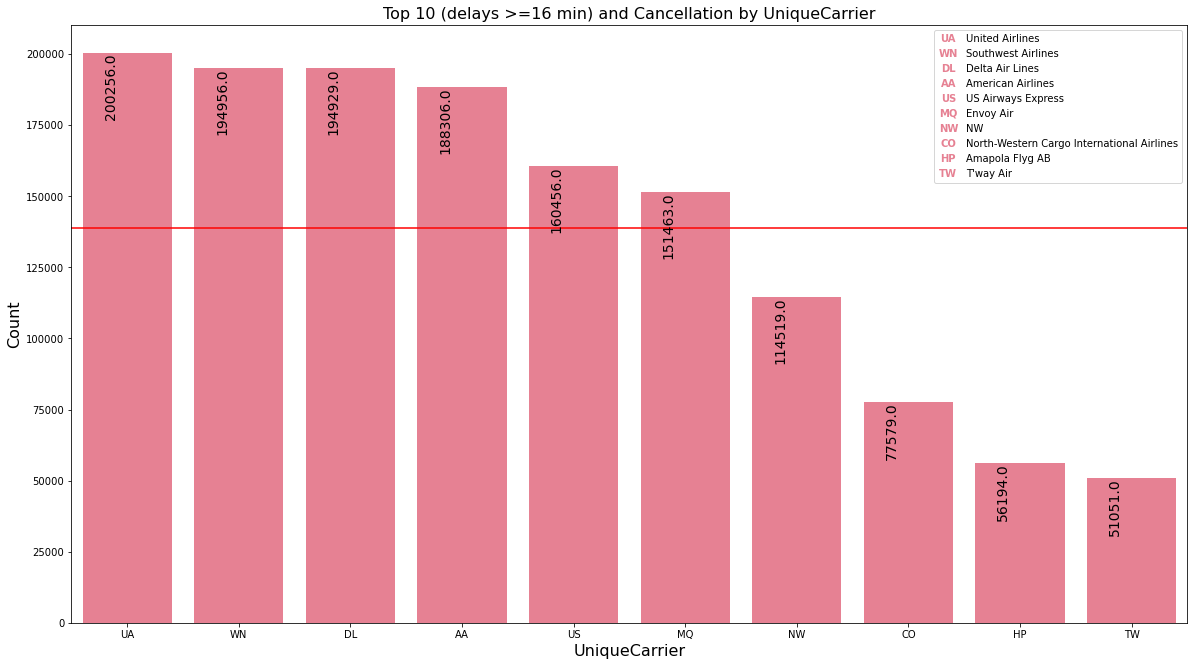

In [3]:
# imports To Add legend
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

#Define class to handel legend
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

# let's plot 'UniqueCarrier, Origin and Dest' to get an idea of the distribution.
# Set plot size
fig, ax = plt.subplots(figsize = [20,11])

#set plot color
colors = sns.color_palette("husl",10)

# Set order to sort bars
orders = df['UniqueCarrier'].value_counts().head(10).index

# Define Plot
sns.countplot(
    x = 'UniqueCarrier',
    data = df,
    color=colors[0],
    order = orders,
    label=[
    "United Airlines",
    "Southwest Airlines",
    "Delta Air Lines", 
    "American Airlines",
    "US Airways Express",
    "Envoy Air",
    "NW",
    "North-Western Cargo International Airlines",
    "Amapola Flyg AB",
    "T'way Air ",
]
)
# show the count values
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()),
               (p.get_x()+0.25, p.get_height()+0.01),
               rotation = 90,
               horizontalalignment='center',
               verticalalignment='top',
               size=14)
# ADD Legend
handltext = ["UA", "WN", "DL", "AA", "US", "MQ", "NW","CO","HP","TW"]
labels = [
    "United Airlines",
    "Southwest Airlines",
    "Delta Air Lines", 
    "American Airlines",
    "US Airways Express",
    "Envoy Air",
    "NW",
    "North-Western Cargo International Airlines",
    "Amapola Flyg AB",
    "T'way Air ",
]

t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

# Add mean line
plt.axhline(df['UniqueCarrier'].value_counts().head(10).mean(), c='red')

# Set titels
plt.title('Top 10 (delays >=16 min) and Cancellation by UniqueCarrier', fontsize=16)
# Set labels fontsize
plt.ylabel('Count', fontsize=16);
plt.xlabel('UniqueCarrier', fontsize=16);

plt.show()

## Most days in September with a flight delay or cancellation

> Days 11, 12, 13, 14 The days with the most flight delays or cancellations,
This is self-evident, after the September 11 attacks, flights were affected by cancellations and delays

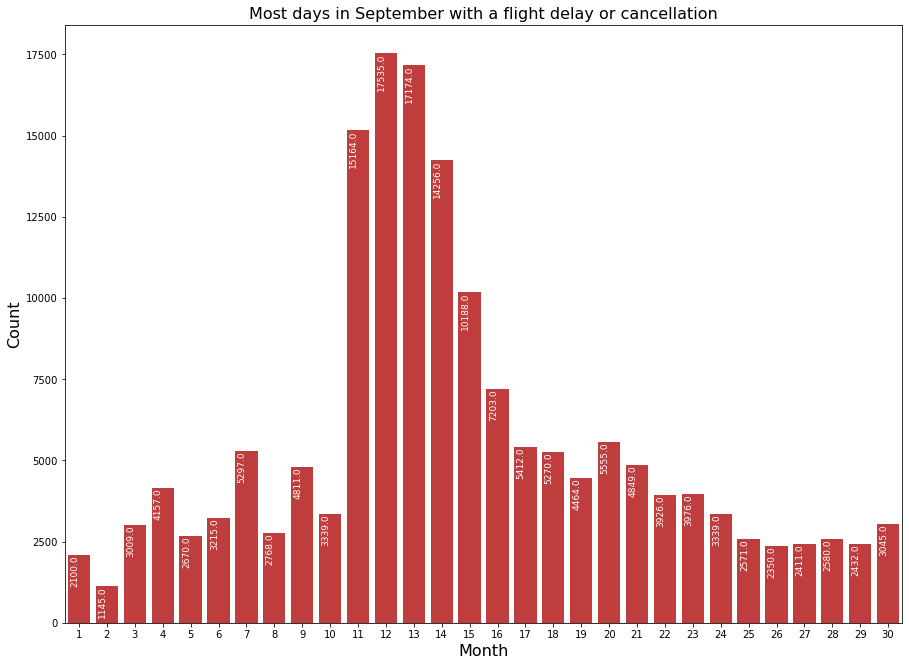

In [4]:
# plot 'DayofMonth' in September to get an idea of the distribution.
# Set plot size
fig, ax = plt.subplots(figsize = [15,11])
# Set Plot Color
colors = sns.color_palette()
# Set plot data
pl = pd.DataFrame(df.query('Month == 9'))
# Define plot
sns.countplot(
    x = 'DayofMonth',
    data = pl,
    color=colors[3],
)

# show the count values
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()),
               (p.get_x()+0.25, p.get_height()+0.01),
               rotation = 90,
               horizontalalignment='center',
               verticalalignment='top',
              size=9,
               color='White'
              )

# Set labels fontsize
plt.ylabel('Count', fontsize=16);
plt.xlabel('Month', fontsize=16);

# Set title
plt.title('Most days in September with a flight delay or cancellation', fontsize=16)
# Show plot
plt.show();

## Departure Delays by day of Month

> **July 1st** and **August 10th** had the highest Average of Departure delays

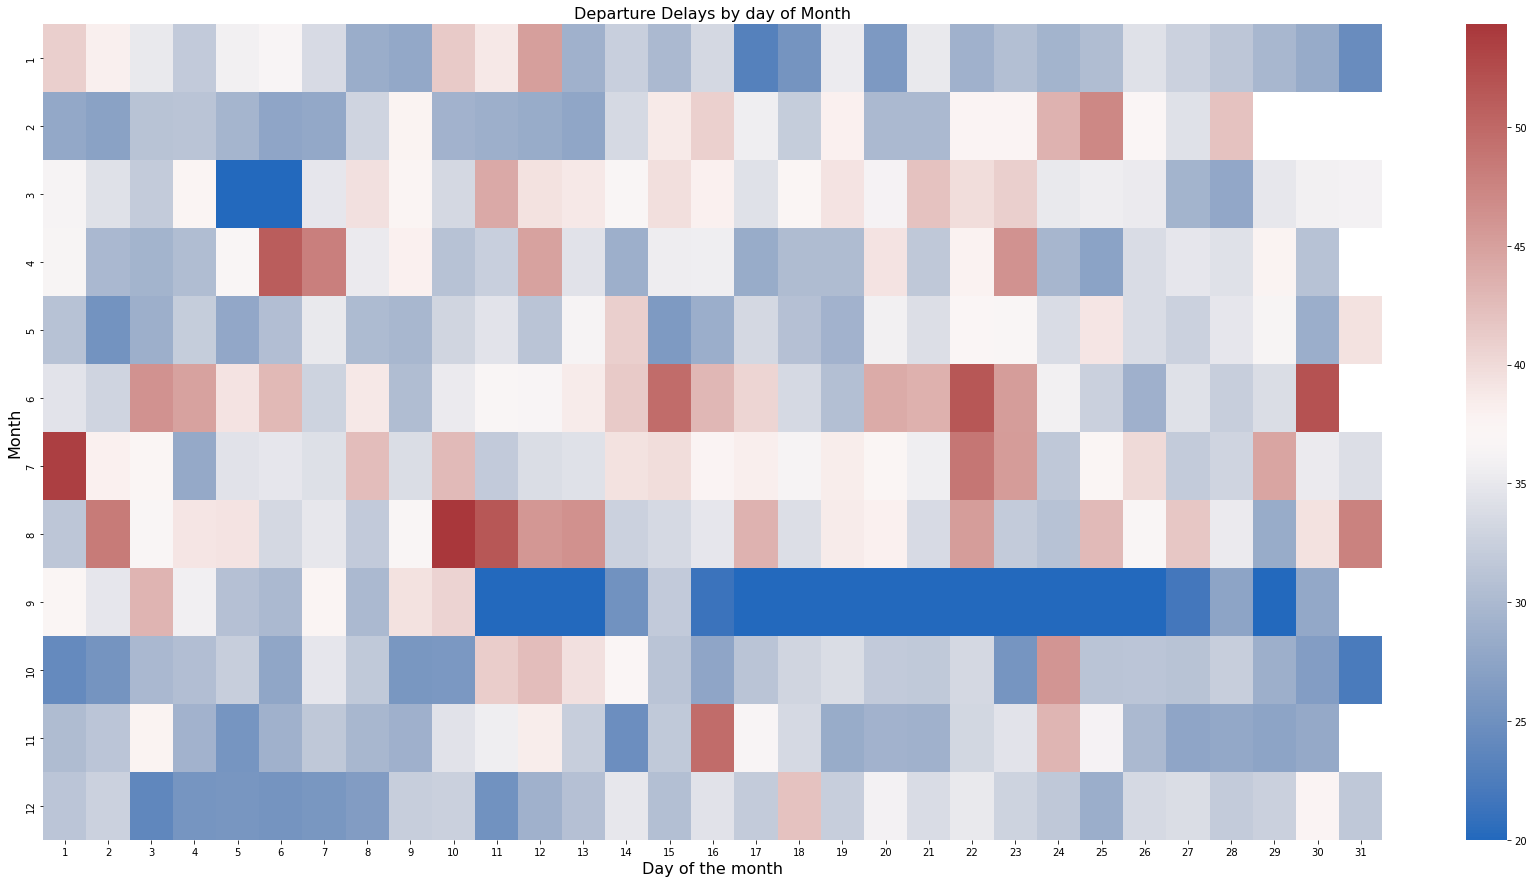

In [5]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayofMonth', values='DepDelay', aggfunc='mean')

#generate plot
plt.figure(figsize=(30,15));
sns.heatmap(pl,cmap='vlag', vmin=20);

#set title and axis

plt.title('Departure Delays by day of Month', fontsize=16);
plt.xlabel('Day of the month', fontsize=16);
plt.ylabel('Month', fontsize=16);

## Departure Delays by day of Week

> Sunday in july is the day that had the highest Average of Departure delays

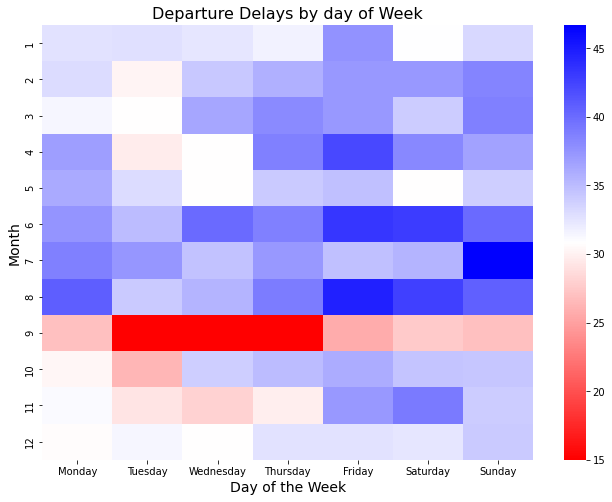

In [6]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayOfWeek', values='DepDelay', aggfunc='mean')

#generate plot
plt.figure(figsize=(11,8));
g = sns.heatmap(pl, cmap='bwr_r', vmin=15);

#set title and axis
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']
g.set_xticklabels(week_day);
#SET Title
plt.title('Departure Delays by day of Week', fontsize=16);
plt.xlabel('Day of the Week', fontsize=14);
plt.ylabel('Month', fontsize=14);

## Departure Delays by day of Week

> 12 September the day that have the most cancellation flights

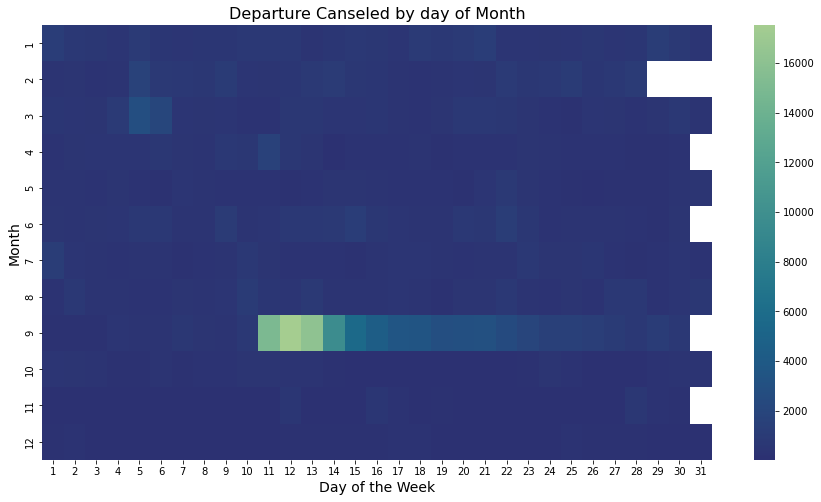

In [7]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayofMonth', values='Cancelled', aggfunc='sum')

#generate plot
plt.figure(figsize=(15,8));
sns.heatmap(pl,cmap='crest_r', vmin=15);

#set title and axis

plt.title('Departure Canseled by day of Month', fontsize=16);
plt.xlabel('Day of the Week', fontsize=14);
plt.ylabel('Month', fontsize=14);

## Scheduled Time Of Departure that have the most delays or cancelation are

> 17:00 (5PM) to 20:00 (8PM) in June, July , August had the most delay time

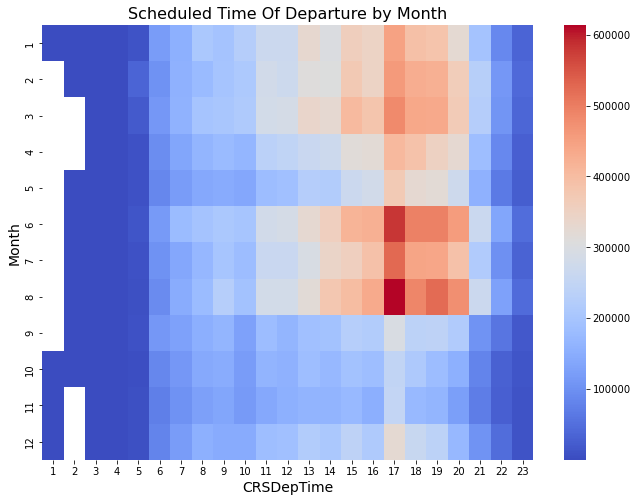

In [8]:
#pivot variables of interest
pl = df.pivot_table(index = 'Month', columns = 'CRSDepTime', values='DepDelay', aggfunc='sum')

#generate plot
plt.figure(figsize=(11,8));
sns.heatmap(pl, cmap='coolwarm', vmin=15);

#set title and axis

plt.title('Scheduled Time Of Departure by Month', fontsize=16);
plt.xlabel('CRSDepTime', fontsize=14);
plt.ylabel('Month', fontsize=14);

In [ ]:
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide.ipynb to slides
[NbConvertApp] Writing 784387 bytes to Part_II_slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide.slides.html
Use Control-C to stop this server
